In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("predictive_maintenance.csv")

df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [4]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.drop(["UDI", "Product ID"], axis = 1, inplace=True)

df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [7]:
# Filtering Categorical Calumns
cat_cols= df.select_dtypes(include= 'O').columns.tolist()
cat_cols

['Type', 'Failure Type']

In [8]:
# value counts for categorical columns
for col in cat_cols:
    print(df[col].value_counts())
    print()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64



In [9]:
# Identify faulty machines with 'Taregt' value 1

df_f = df[df.Target==1]
df_f['Failure Type'].value_counts()

Failure Type
Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: count, dtype: int64

In [10]:
# Drop No failure Rows that shows the Failure But Actually they are not
idx= df_f[df_f['Failure Type']== 'No Failure'].index
df.drop(idx, axis=0, inplace= True)

In [11]:
# Identify faulty machines with 'Taregt' value 0

df_f = df[df.Target==0]
df_f['Failure Type'].value_counts()

Failure Type
No Failure         9643
Random Failures      18
Name: count, dtype: int64

In [12]:
#Drop Not random Failure Which are not actually Failure 
idx= df_f[df_f['Failure Type']== 'Random Failures'].index
df.drop(idx, axis=0, inplace= True)

In [13]:
# Identify numerical Columns
num_cols= df.select_dtypes(exclude='O').columns.tolist()
num_cols

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target']

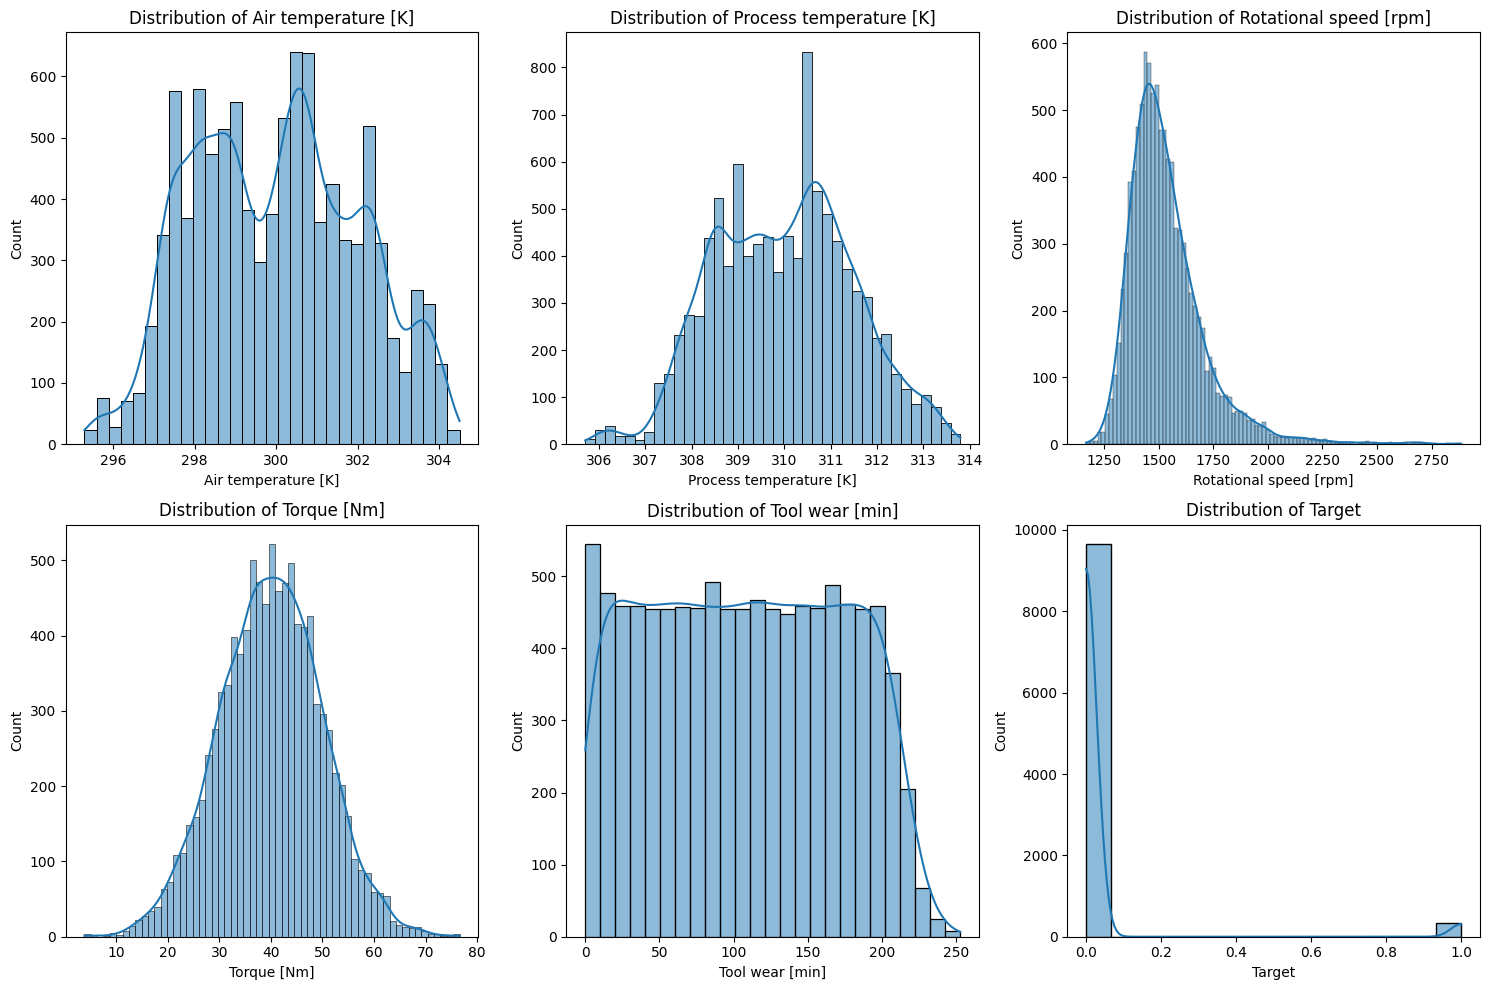

In [14]:
plt.figure(figsize=(15, 10))
numerical_columns = df.select_dtypes(include=["float", "int"]).columns

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True )
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

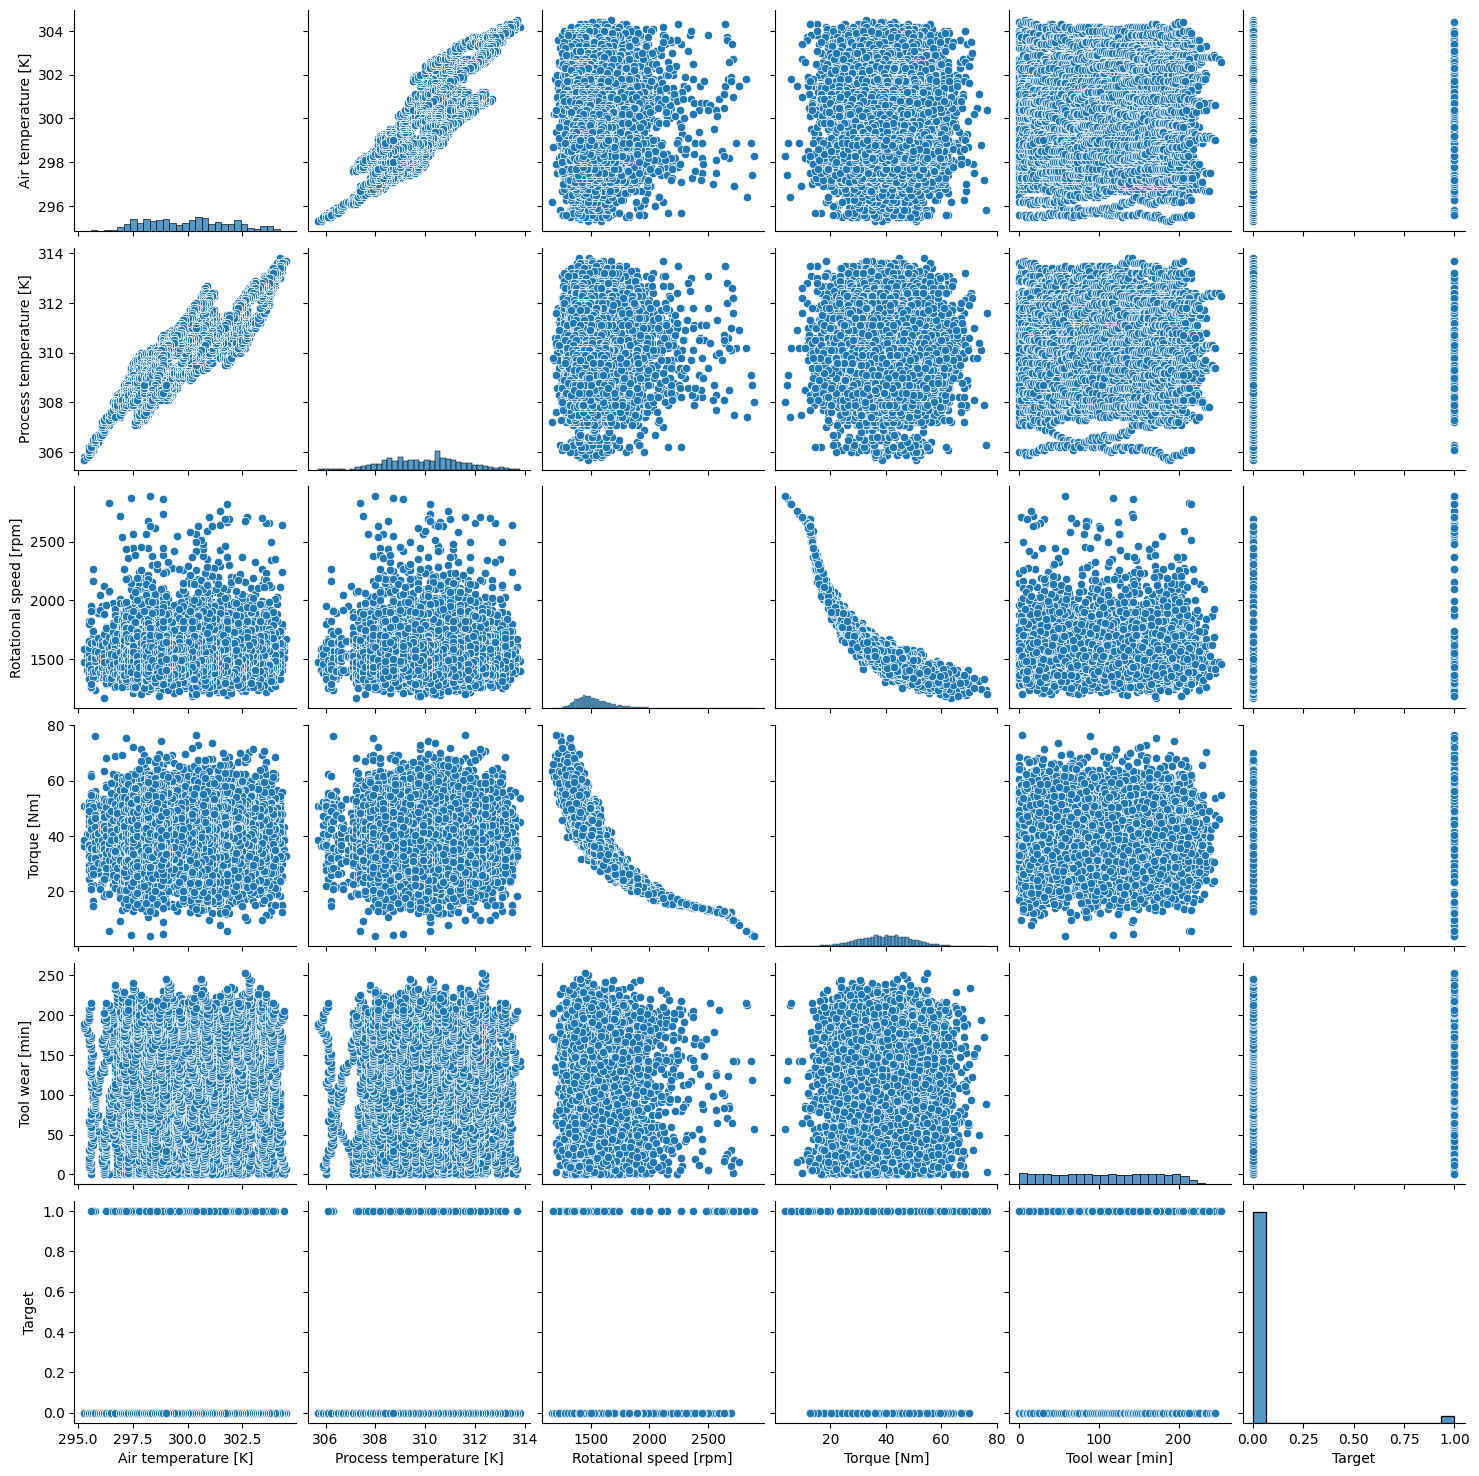

In [15]:
sns.pairplot(df)

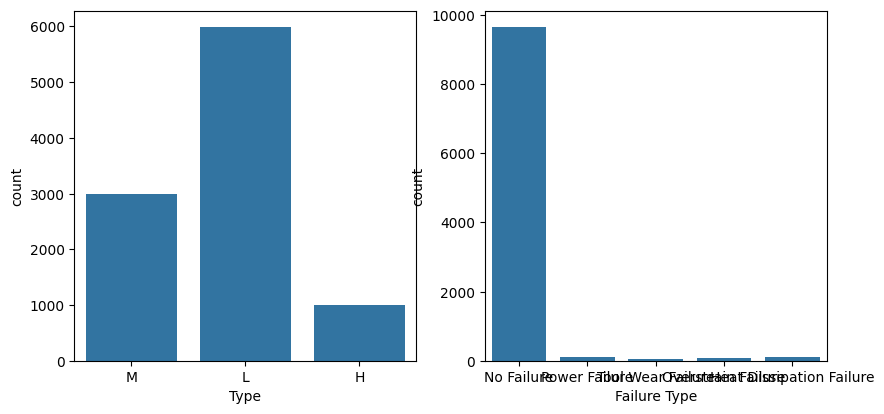

In [16]:
plt.figure(figsize= (15,10))

for i, col in  enumerate(cat_cols, 1):
    plt.subplot(2,3,i)
    sns.countplot(data= df, x= col)
plt.show()

<Axes: >

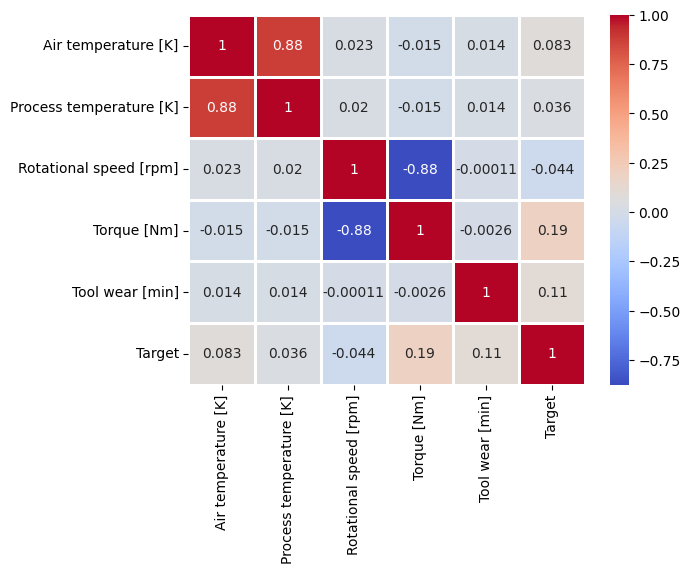

In [17]:
sns.heatmap(df.corr(numeric_only= True), annot= True, cmap= 'coolwarm', linewidths=2)

In [18]:
# Preparing data for model Training

x= df.drop(['Target', 'Failure Type'], axis= 1)
y= df['Target']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
# Filtering the Categorical and Numerical Features for the Further Analysis and Operations
cat_cols= X_train.select_dtypes(include= "O").columns.tolist()
num_cols= X_train.select_dtypes(exclude= "O").columns.tolist()

X_train

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
1288,M,298.5,309.6,1441,48.2,107
4535,L,302.4,310.2,1503,36.2,166
6352,L,300.0,309.6,1496,38.8,27
3846,L,302.3,310.9,1403,47.2,173
2823,M,300.3,309.5,1320,62.2,142
...,...,...,...,...,...,...
5752,H,302.3,311.8,1804,25.0,43
5202,L,303.7,312.7,1335,51.1,161
5401,M,302.6,312.3,1454,54.8,253
860,H,296.1,306.9,1541,32.6,33


In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

encoder = LabelEncoder()
X_train["Type"] = encoder.fit_transform(X_train["Type"])

scaler = StandardScaler()
X_train[["Type", "Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]] = scaler.fit_transform(X_train[["Type", "Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]])

X_train

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
1288,1.337179,-0.749668,-0.268766,-0.550438,0.829381,-0.023073
4535,-0.334138,1.201768,0.135168,-0.205056,-0.374298,0.907647
6352,-0.334138,0.000884,-0.268766,-0.244050,-0.113501,-1.285067
3846,-0.334138,1.151731,0.606425,-0.762124,0.729074,1.018072
2823,1.337179,0.150995,-0.336089,-1.224491,2.233673,0.529049
...,...,...,...,...,...,...
5752,-2.005455,1.151731,1.212327,1.471722,-1.497731,-1.032668
5202,-0.334138,1.852247,1.818228,-1.140931,1.120270,0.828773
5401,1.337179,1.301842,1.548939,-0.478019,1.491404,2.280065
860,-2.005455,-1.950552,-2.086472,0.006631,-0.735401,-1.190417


In [22]:
X_test["Type"] = encoder.transform(X_test["Type"])
X_test[["Type", "Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]] = scaler.transform(X_test[["Type", "Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]])

X_test

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
3363,-0.334138,0.701400,0.404458,0.084620,0.337879,1.633294
2410,-0.334138,-0.449447,-1.009313,0.831093,-0.785554,1.317795
4383,-0.334138,0.851510,-0.336089,-1.347047,2.564684,1.901467
107,1.337179,-0.599558,-0.807346,-0.238480,0.688952,-0.575195
9418,-0.334138,-0.999852,-1.076635,-0.600574,0.628768,-1.537466
...,...,...,...,...,...,...
7114,-2.005455,0.451216,0.269813,-0.461307,0.388032,-0.622520
4829,-0.334138,1.702136,1.279649,-0.271904,-0.173684,-1.300842
9924,1.337179,-0.749668,-0.941991,-0.867967,1.451281,-1.016893
2955,1.337179,0.351142,-0.336089,-0.561580,0.388032,-1.064218


Accuracy is: 0.9729323308270676
Precision is: 0.6923076923076923
Recall is: 0.15254237288135594
AUC score is: 0.5752381285894382
Confusion Matrix is: [[1932    4]
 [  50    9]]
Classification Report is:               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1936
           1       0.69      0.15      0.25        59

    accuracy                           0.97      1995
   macro avg       0.83      0.58      0.62      1995
weighted avg       0.97      0.97      0.96      1995



Text(0, 0.5, 'TPR')

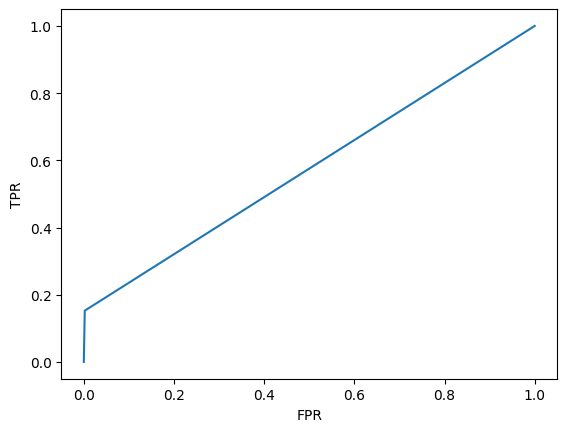

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# Fit the Modle on train data
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

LogisticRegressionAccuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy is: {LogisticRegressionAccuracy}")
print(f"Precision is: {precision_score(y_test, y_pred)}")
print(f"Recall is: {recall_score(y_test, y_pred)}")
print(f"AUC score is: {roc_auc_score(y_test, y_pred)}")
print(f"Confusion Matrix is: {confusion_matrix(y_test, y_pred)}")
print(f"Classification Report is: {classification_report(y_test, y_pred)}")

fpr, tpr,_ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

Accuracy is: 0.9784461152882206
Precision is: 0.8333333333333334
Recall is: 0.3389830508474576
AUC score is: 0.6684584675724892
Confusion Matrix is: [[1932    4]
 [  39   20]]
Classification Report is:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1936
           1       0.83      0.34      0.48        59

    accuracy                           0.98      1995
   macro avg       0.91      0.67      0.74      1995
weighted avg       0.98      0.98      0.97      1995



Text(0, 0.5, 'TPR')

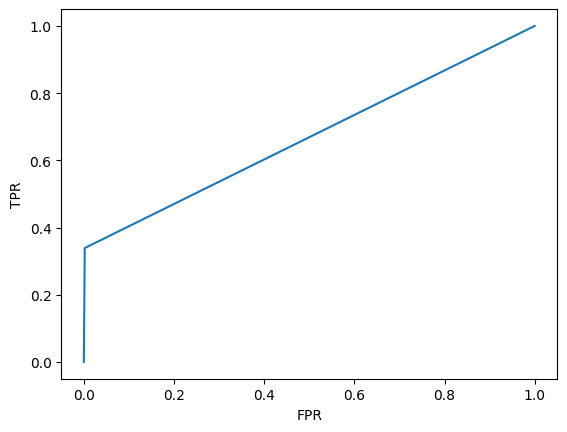

In [24]:
from sklearn.svm import SVC

# Fit the Modle on train data
clf = SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

SVCAccuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy is: {SVCAccuracy}")
print(f"Precision is: {precision_score(y_test, y_pred)}")
print(f"Recall is: {recall_score(y_test, y_pred)}")
print(f"AUC score is: {roc_auc_score(y_test, y_pred)}")
print(f"Confusion Matrix is: {confusion_matrix(y_test, y_pred)}")
print(f"Classification Report is: {classification_report(y_test, y_pred)}")

fpr, tpr,_ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [25]:
from sklearn.svm import SVC

# Fit the Modle on train data
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

SVCRBFAccuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy is: {SVCRBFAccuracy}")
print(f"Precision is: {precision_score(y_test, y_pred)}")
print(f"Recall is: {recall_score(y_test, y_pred)}")
print(f"AUC score is: {roc_auc_score(y_test, y_pred)}")
print(f"Confusion Matrix is: {confusion_matrix(y_test, y_pred)}")
print(f"Classification Report is: {classification_report(y_test, y_pred)}")

Accuracy is: 0.9784461152882206
Precision is: 0.8333333333333334
Recall is: 0.3389830508474576
AUC score is: 0.6684584675724892
Confusion Matrix is: [[1932    4]
 [  39   20]]
Classification Report is:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1936
           1       0.83      0.34      0.48        59

    accuracy                           0.98      1995
   macro avg       0.91      0.67      0.74      1995
weighted avg       0.98      0.98      0.97      1995



Accuracy is: 0.9799498746867168
Precision is: 0.6417910447761194
Recall is: 0.7288135593220338
AUC score is: 0.8582084325535789
Confusion Matrix is: [[1912   24]
 [  16   43]]
Classification Report is:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1936
           1       0.64      0.73      0.68        59

    accuracy                           0.98      1995
   macro avg       0.82      0.86      0.84      1995
weighted avg       0.98      0.98      0.98      1995



Text(0, 0.5, 'TPR')

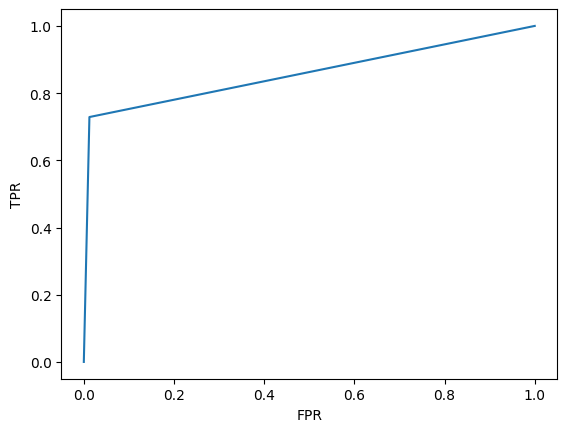

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Fit the Modle on train data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

DecisionTreeClassifierAccuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy is: {DecisionTreeClassifierAccuracy}")
print(f"Precision is: {precision_score(y_test, y_pred)}")
print(f"Recall is: {recall_score(y_test, y_pred)}")
print(f"AUC score is: {roc_auc_score(y_test, y_pred)}")
print(f"Confusion Matrix is: {confusion_matrix(y_test, y_pred)}")
print(f"Classification Report is: {classification_report(y_test, y_pred)}")

fpr, tpr,_ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

Accuracy is: 0.9894736842105263
Precision is: 0.9523809523809523
Recall is: 0.6779661016949152
AUC score is: 0.8384665219218378
Confusion Matrix is: [[1934    2]
 [  19   40]]
Classification Report is:               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1936
           1       0.95      0.68      0.79        59

    accuracy                           0.99      1995
   macro avg       0.97      0.84      0.89      1995
weighted avg       0.99      0.99      0.99      1995



Text(0, 0.5, 'TPR')

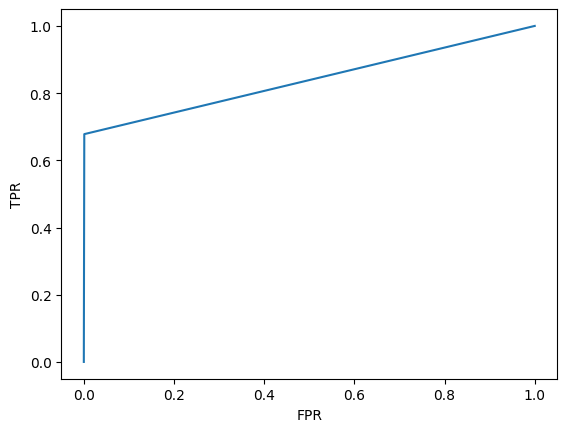

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Fit the Modle on train data
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

RandomForestClassifierAccuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy is: {RandomForestClassifierAccuracy}")
print(f"Precision is: {precision_score(y_test, y_pred)}")
print(f"Recall is: {recall_score(y_test, y_pred)}")
print(f"AUC score is: {roc_auc_score(y_test, y_pred)}")
print(f"Confusion Matrix is: {confusion_matrix(y_test, y_pred)}")
print(f"Classification Report is: {classification_report(y_test, y_pred)}")

fpr, tpr,_ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [28]:
print(f"Accuracy is: {LogisticRegressionAccuracy}")
print(f"Accuracy is: {SVCAccuracy}")
print(f"Accuracy is: {SVCRBFAccuracy}")
print(f"Accuracy is: {DecisionTreeClassifierAccuracy}")
print(f"Accuracy is: {RandomForestClassifierAccuracy}")

Accuracy is: 0.9729323308270676
Accuracy is: 0.9784461152882206
Accuracy is: 0.9784461152882206
Accuracy is: 0.9799498746867168
Accuracy is: 0.9894736842105263
